### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 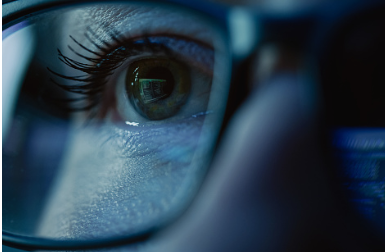 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import os
!pip install opencv-python
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image

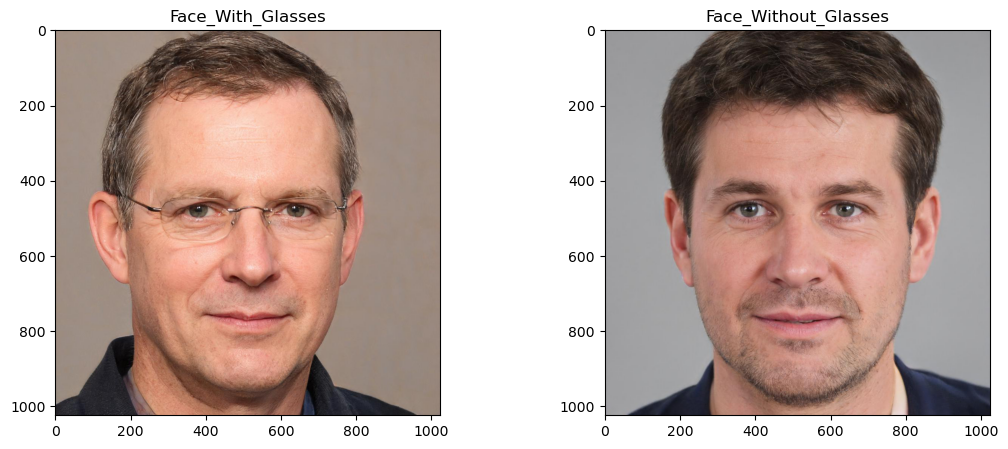

In [2]:
# display of images of each class. There are two diffrent classes in the dataset
# Face_With_Glasses and Face_Without_Glasses


with_glasses = image.load_img(r'D:\e\resources\Assignments\7 Assignment - Image classification using CNN\glasses_3_3\glasses\glasses\face-1154.jpg')
without_glasses = image.load_img(r'D:\e\resources\Assignments\7 Assignment - Image classification using CNN\glasses_3_3\glasses\no_glasses\face-1890.jpg')

plt.figure(1, figsize = (13 , 5))
plt.subplot(1 , 2 , 1)
plt.imshow(with_glasses)
plt.title('Face_With_Glasses')


plt.subplot(1 , 2 , 2)
plt.imshow(without_glasses)
plt.title('Face_Without_Glasses')


plt.show()

In [3]:
# loading image
##      Image augmentation
# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

width = 224
height = 224



# train data
trainDatagen = datagen.flow_from_directory(directory=r'D:\e\resources\Assignments\7 Assignment - Image classification using CNN\glasses_3_3\glasses',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 69 images belonging to 2 classes.


In [4]:
# test data
valDatagen = datagen.flow_from_directory(directory=r'D:\e\resources\Assignments\7 Assignment - Image classification using CNN\glasses_3_3\glasses',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 17 images belonging to 2 classes.


In [5]:
# now lets build the model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

In [8]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy',metrics = ['accuracy'])

In [9]:
early_stop = EarlyStopping(monitor='val_loss',patience= 12)

In [11]:
history = model.fit(x=trainDatagen,epochs=10,batch_size=15,validation_data=valDatagen,callbacks=[early_stop])

Epoch 1/10


5/5 [==============================] - 10s 2s/step - loss: 0.7107 - accuracy: 0.5942 - val_loss: 0.6736 - val_accuracy: 0.7059
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 0.6288 - accuracy: 0.6957 - val_loss: 0.6269 - val_accuracy: 0.7059
Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: 0.6142 - accuracy: 0.6957 - val_loss: 0.6295 - val_accuracy: 0.7059
Epoch 4/10
5/5 [==============================] - 7s 2s/step - loss: 0.6004 - accuracy: 0.6957 - val_loss: 0.6386 - val_accuracy: 0.7059
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 0.6216 - accuracy: 0.6957 - val_loss: 0.6115 - val_accuracy: 0.7059
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 0.6006 - accuracy: 0.6957 - val_loss: 0.6532 - val_accuracy: 0.7059
Epoch 7/10
5/5 [==============================] - 7s 1s/step - loss: 0.5905 - accuracy: 0.6957 - val_loss: 0.6137 - val_accuracy: 0.7059
Epoch 8/10
5/5 [======================

In [10]:
history = model.fit(x=trainDatagen,epochs=30,batch_size = 5,validation_data=valDatagen,callbacks=[early_stop])

Epoch 1/30


5/5 [==============================] - 11s 2s/step - loss: 0.7855 - accuracy: 0.6232 - val_loss: 0.6857 - val_accuracy: 0.7647
Epoch 2/30
5/5 [==============================] - 4s 799ms/step - loss: 0.6196 - accuracy: 0.6667 - val_loss: 0.5992 - val_accuracy: 0.7059
Epoch 3/30
5/5 [==============================] - 7s 2s/step - loss: 0.6039 - accuracy: 0.6957 - val_loss: 0.6604 - val_accuracy: 0.7059
Epoch 4/30
5/5 [==============================] - 7s 1s/step - loss: 0.6291 - accuracy: 0.6957 - val_loss: 0.6501 - val_accuracy: 0.7059
Epoch 5/30
5/5 [==============================] - 7s 1s/step - loss: 0.5710 - accuracy: 0.7101 - val_loss: 0.6028 - val_accuracy: 0.7059
Epoch 6/30
5/5 [==============================] - 8s 2s/step - loss: 0.6052 - accuracy: 0.6957 - val_loss: 0.6148 - val_accuracy: 0.7059
Epoch 7/30
5/5 [==============================] - 7s 1s/step - loss: 0.6088 - accuracy: 0.6812 - val_loss: 0.6656 - val_accuracy: 0.7059
Epoch 8/30
5/5 [===================

In [11]:
# Training for more epochs allows the model to see the training data multiple times,
# which can be beneficial up to a certain point as you can see above by increasing epochs the accuracy increased
# Increasing the number of epochs too much may lead to overfitting on the training data.

In [12]:
# Smaller batch sizes allow the model to update its weights more frequently.
# that makes the model learn fast 
#  However, very small batch sizes may result in noisy gradients and slower convergence.

1/1 [==============================] - 0s 48ms/step


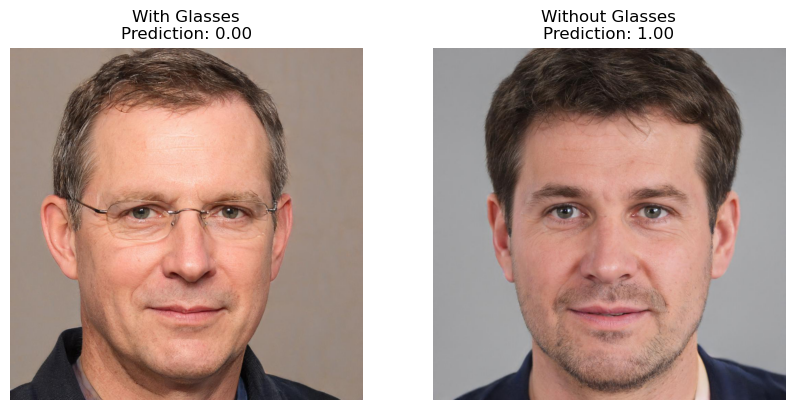

In [26]:
image_path_with_glasses = r'D:\e\resources\Assignments\7 Assignment - Image classification using CNN\glasses_3_3\glasses\glasses\face-1154.jpg'
image_path_without_glasses = r'D:\e\resources\Assignments\7 Assignment - Image classification using CNN\glasses_3_3\glasses\no_glasses\face-1890.jpg'


img_array_with_glasses = image.img_to_array(image.load_img(image_path_with_glasses, target_size=(224, 224)))
img_array_with_glasses = np.expand_dims(img_array_with_glasses, axis=0)
img_array_without_glasses = image.img_to_array(image.load_img(image_path_without_glasses, target_size=(224, 224)))
img_array_without_glasses = np.expand_dims(img_array_without_glasses, axis=0)


prediction_with_glasses = model.predict(img_array_with_glasses)
prediction_without_glasses = model.predict(img_array_without_glasses)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(image.load_img(image_path_with_glasses))
plt.title('With Glasses\nPrediction: {:.2f}'.format(prediction_with_glasses[0][0]))
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(image.load_img(image_path_without_glasses))
plt.title('Without Glasses\nPrediction: {:.2f}'.format(prediction_without_glasses[0][0]))
plt.axis('off')

plt.show()

In [ ]:
# conclusion
## my CNN model is able to classify the people with and without glasses. with the accuracy: 0.9855 which is good.